In [1]:
import pandas as pd
import numpy as np
import pyvocals
from os import listdir, path
from warnings import filterwarnings
filterwarnings('ignore')

**Get Dyadic Play start time.**

In [2]:
conditions = pd.read_csv('./data/1663_Conditions.csv')
conditions[['Start', 'End']] = conditions[['Start', 'End']].apply(lambda t: pd.to_datetime(t))
start_time = conditions.loc[conditions.Condition == 'Dyadic Play', 'Start'].item()

**Pre-process audio data.**

In [3]:
files = sorted([f for f in listdir('data') if f.endswith('mp3') and not f.startswith('.')])
audio_data = {}
for f in files:
    fname = f.split('.')[0]
    person = f.split('_')[-1].split('.')[0]
    signal = pyvocals.preprocess_audio(f'./data/{f}', start_time = start_time, target_fs = 4)
    signal.to_csv(f'./data/{fname}.csv')
    audio_data[person] = signal
    
print(audio_data.keys())

dict_keys(['C', 'P'])


**Get each person's time series of vocal states.**

In [4]:
child = audio_data['C'].copy()
child.name = 'Child'
parent = audio_data['P'].copy()
parent.name = 'Parent'

child_arr = np.array(child).flatten()
parent_arr = np.array(parent).flatten()

dyad = pyvocals.get_vocal_states(child_arr, parent_arr, start_time = start_time, fs = 4)

**Label vocal turns in each person's time series.**

In [5]:
child_turns, parent_turns = pyvocals.get_vocal_turns(dyad['Child'], dyad['Parent'], fs = 4, max_pause_duration = 3)

for (start, end) in child_turns:
    dyad.loc[start:end, 'Child Turn'] = 1
for (start, end) in parent_turns:
    dyad.loc[start:end, 'Parent Turn'] = 1

dyad.head(10)

,Timestamp,Child,Parent,Child Turn,Parent Turn
0,2016-10-14 11:07:07.000,0,0,NaN,NaN
1,2016-10-14 11:07:07.250,0,0,NaN,NaN
2,2016-10-14 11:07:07.500,0,0,NaN,NaN
3,2016-10-14 11:07:07.750,0,0,NaN,NaN
4,2016-10-14 11:07:08.000,0,0,NaN,NaN
5,2016-10-14 11:07:08.250,0,1,NaN,NaN
6,2016-10-14 11:07:08.500,5,1,NaN,NaN
7,2016-10-14 11:07:08.750,1,2,1.0,NaN
8,2016-10-14 11:07:09.000,1,2,1.0,NaN
9,2016-10-14 11:07:09.250,1,2,1.0,NaN


In [6]:
dyad.to_csv('./data/1663_Dyadic_Play_Vocal_States.csv', index = False)

**Visualize the audio signals.**

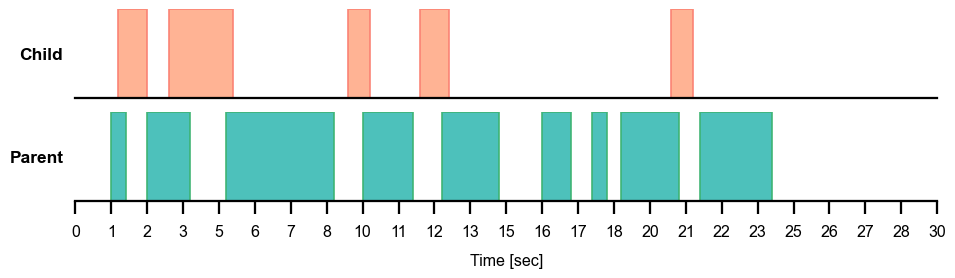

In [7]:
fig = pyvocals.plot_vocals(child_arr, parent_arr, fs = 4, seg_num = 1, seg_size = 30, p1_label = 'Child', p2_label = 'Parent')
fig.show()